In [1]:
from pylab import *
%matplotlib inline

In [2]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1] - x[0]) <= 5.*h:
        h= (x[1] - x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol


In [37]:
def mov(xp_xs,t,a_b=[0,0]):
    rp= sqrt(xp_xs[0]**2 + xp_xs[1]**2)
    rs= sqrt(xp_xs[4]**2 + xp_xs[5]**2)
    dif_xp_xs = (xp_xs[0:2] - xp_xs[4:6])
    dist_xp_xs = sqrt(dif_xp_xs[0]**2 + dif_xp_xs[1]**2)
    dxp,dyp = xp_xs[2],xp_xs[3] # asignamos los valores de la derivada de la posición del planeta
    dvxp = -(xp_xs[0]/rp**3) - (a_b[0]*dif_xp_xs[0])/(dist_xp_xs**3)
    dvyp = -(xp_xs[1]/rp**3) - (a_b[0]*dif_xp_xs[1])/(dist_xp_xs**3)
    
    dxs,dys= xp_xs[6],xp_xs[7] # asignamos los valores de la derivada de la posición del satelite
    dvxs = -(xp_xs[4]/rs**3) + (a_b[1]*dif_xp_xs[0])/(dist_xp_xs**3)
    dvys = -(xp_xs[5]/rs**3) + (a_b[1]*dif_xp_xs[1])/(dist_xp_xs**3)
    return array([dxp,dyp,dvxp,dvyp,dxs,dys,dvxs,dvys])
    

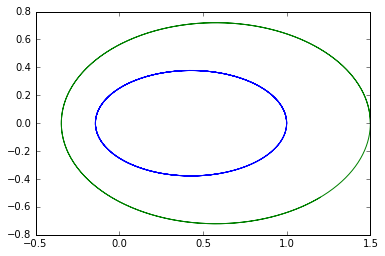

In [38]:
p_ini=[1,0,0,0.5,1.5,0,0,0.5]
t,r=RK4(mov,p_ini,[0,10])
plot (r[:,0],r[:,1],r[:,4],r[:,5])

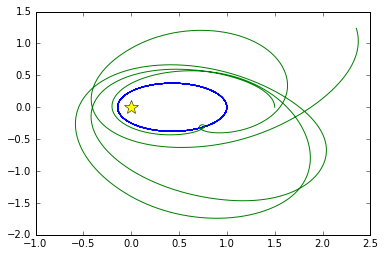

In [39]:
p_ini = [1,0,0,0.5,1.5,0,0,0.5]
t,r1 = RK4(mov, p_ini,[0,10*pi],[0,.1],.01)
plot (r1[:,0],r1[:,1],r1[:,4],r1[:,5])
plot (0,0, "*",color = "yellow", markersize = 15)
show()

In [7]:
a = array([1,2,3,4,5,6,8])
(a[0:2] - a[4:5])**2

array([16,  9])